#Radhakrishna

#EMAIL SPAM CLASSIFIER PROJECT

#import the library

In [ ]:
import numpy as np
import pandas as pd
import nltk
!pip install nltk
import nltk
import seaborn as sns

nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#read the dataframe

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3270,spam,You have 1 new voicemail. Please call 08719181...,NaN,NaN,NaN
1816,ham,Are you going to write ccna exam this week??,NaN,NaN,NaN
536,ham,"Probably gonna be here for a while, see you la...",NaN,NaN,NaN
4441,ham,Dear i am not denying your words please,NaN,NaN,NaN
4526,ham,Understand. his loss is my gain :) so do you w...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)


#ist- data cleaning
# 2nd-eda
# 3rd-text preprocessing
# 4th-model building
# 5th-evaluation
# 6th-improvement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


  **Unnamed: 2  50 non-null        Unnamed: 3  12 non-null     
Unnamed: 4  6 non-null      (these coulms are having lots of null value so we can drop these coulms)**

#droping the irrelevent coulmns

In [ ]:
#inplace will do the modification at that dataframe only it will not return new data frame
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3657,ham,R u here yet? I'm wearing blue shirt n black p...
2927,ham,Anything...
29,ham,Ahhh. Work. I vaguely remember that! What does...
1134,ham,U wake up already? Thanx 4 e tau sar piah it's...
4222,ham,Stupid auto correct on my phone


renaming the columns

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5174,ham,Water logging in desert. Geoenvironmental impl...
3165,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...
4600,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...
264,ham,Why you Dint come with us.
2172,ham,Yavnt tried yet and never played original either


importing the encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ans=encoder.fit_transform(df['target'])
df['target']=ans
df.sample(5)

#it will give ham=0 and spam=1
#for label, encoded_label in zip(df['target'], ans):
    #print(f"{label} --> {encoded_label}")



,target,text
1950,0,Oh ic. I thought you meant mary jane.
5343,0,No go. No openings for that room 'til after th...
5001,0,You still around? Looking to pick up later
4150,0,ÌÏ comin to fetch us oredi...
3269,0,K actually can you guys meet me at the sunoco ...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

df = df.drop_duplicates(keep='first') is removing duplicate rows based on all columns in the DataFrame and keeping only the first occurrence of each duplicated row.

In [ ]:
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
df['num_charaters']=df['text'].apply(len)
df.sample(5)

,target,text,num_charaters
1953,0,Then just eat a shit and wait for ur monkey fa...,92
1714,0,Yeah I don't see why not,24
3941,0,She's borderline but yeah whatever.,35
2651,0,"Text me when you get off, don't call, my phone...",63
3328,0,Sac will score big hundred.he is set batsman:-),47


#df['text']: This selects the 'text' column from the DataFrame

df.apply(lambda x: ...): This applies a function to each element in the 'text' column. The lambda function is an anonymous function that takes each text entry (x) in the 'text' column as input.

nltk.word_tokenize(x): This uses the NLTK library's word_tokenize function to tokenize the input text x into a list of words.

len(...): This calculates the length of the list of words generated by nltk.word_tokenize(x).

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)


,target,text,num_charaters,num_words
2803,0,Lil fever:) now fine:),22,8
3556,0,I had it already..sabarish asked me to go..,43,11
1437,0,Wat so late still early mah. Or we juz go 4 di...,71,19
3291,0,Dear good morning how you feeling dear,38,7
4573,0,:( but your not here....,24,7


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_charaters,num_words,num_sentences
1810,0,"Now, whats your house # again ? And do you hav...",64,16,2
1215,0,that would be good Û_ I'll phone you tomo lun...,85,19,1
5552,0,Have a safe trip to Nigeria. Wish you happines...,91,18,2
2812,0,Enjoy the showers of possessiveness poured on ...,133,30,1
960,0,U sure u can't take any sick time?,34,10,1


In [ ]:
df[df['target']==0][['num_charaters','num_words','num_sentences']].describe()

,num_charaters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']==1][['num_charaters','num_words','num_sentences']].describe()

,num_charaters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<ipython-input-22-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

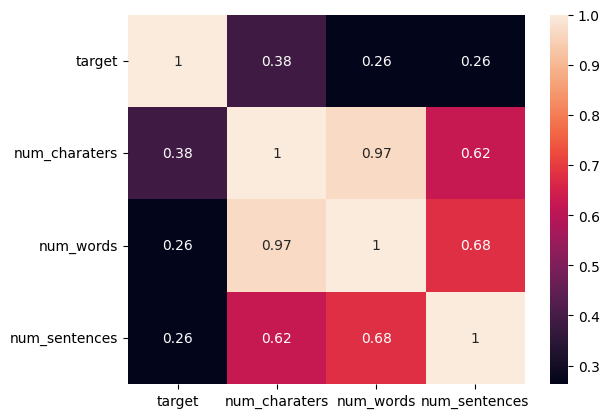

In [ ]:
sns.heatmap(df.corr(),annot=True)

#Data preprocessing
#1st- convert into a lower case
#2nd- tokeninize
#3rd-Remoing special character
#4th-Removing stoping word and puncuation.
#5th-stemming

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# i am defining a function to peform all these operation in a single go.
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i  not in stopwords.words('english') and i  not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [ ]:
df['transformed_text']= df['text'].apply(transform_text)


In [ ]:
df.sample(5)

,target,text,num_charaters,num_words,num_sentences,transformed_text
858,0,Spoons it is then okay?,23,6,1,spoon okay
3548,0,"I got like $ &lt;#&gt; , I can get some more l...",85,25,2,got like lt gt get later though get whatev fee...
4952,0,I lost 4 pounds since my doc visit last week w...,100,24,2,lost 4 pound sinc doc visit last week woot woo...
3463,0,My phone,8,2,1,phone
3340,0,Still i have not checked it da. . .,35,10,3,still check da


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

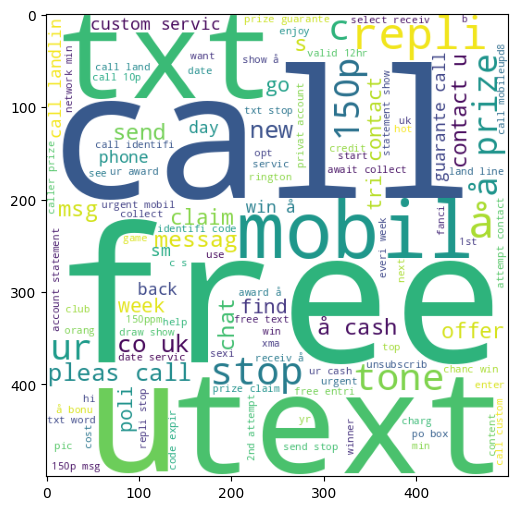

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

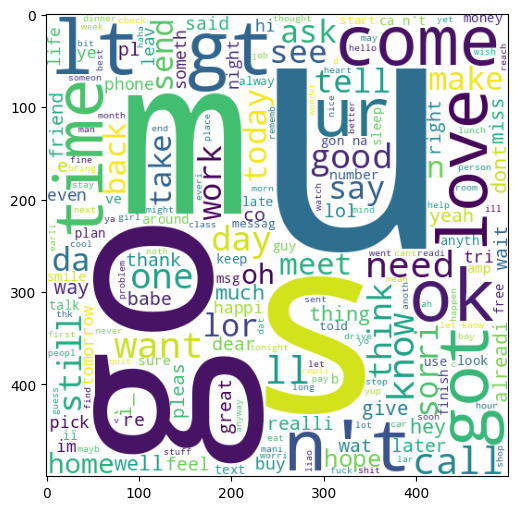

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_charaters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


#MODEL BUILDING

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# Assuming df['transformed_text'] contains the raw text documents
#raw_documents = df['transformed_text'].tolist()
# Fitting and transforming the text data
x = tfidf.fit_transform(df['transformed_text']).toarray()
#x = cv.fit_transform(df['transformed_text']).toarray()


In [ ]:
x.shape

(5169, 3000)

In [ ]:
# Fit and transform the text data
X = cv.fit_transform(df['transformed_text']).toarray()

# Display the vocabulary
print("Vocabulary:", cv.get_feature_names_out())

# Display the first 10 rows with 50 columns of the vectorized data
df_vectorized = pd.DataFrame(X[90:96, 200:206], columns=cv.get_feature_names_out()[200:206])
print("\nFirst 10 rows with 50 columns of the vectorized data:")
print(df_vectorized)



Vocabulary: ['00' '000' '000pe' ... 'ûïharri' 'ûò' 'ûówel']

First 10 rows with 50 columns of the vectorized data:
   09057039994  09058091854  09058091870  09058094454  09058094455  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   09058094507  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  


In [ ]:
y=df['target'].values
y
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_prad1=gnb.predict(x_test)
print((accuracy_score(y_test,y_prad1)))
print((confusion_matrix(y_test,y_prad1)))
print((precision_score(y_test,y_prad1)))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [ ]:
mnb.fit(x_train,y_train)
y_prad2=mnb.predict(x_test)
print((accuracy_score(y_test,y_prad2)))
print((confusion_matrix(y_test,y_prad2)))
print((precision_score(y_test,y_prad2)))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_prad3=bnb.predict(x_test)
print((accuracy_score(y_test,y_prad3)))
print((confusion_matrix(y_test,y_prad3)))
print((precision_score(y_test,y_prad3)))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0
